# ***Stack Overflow Annual Developer Survey 2024***




# ***Business understanding***

The tech industry is evolving rapidly, and understanding the factors that influence developer success is crucial for companies, educators, and developers themselves. This project explores insights from the Stack Overflow Developer Survey 2024 to answer key questions about salaries, education, job search behavior, and popular technologies. By analyzing these patterns, we aim to identify what makes developers thrive in today’s competitive market.



# ***Download the Datasets***

In [1]:
import kagglehub  # Import kagglehub to download datasets directly from Kaggle

# Download the latest version of the Stack Overflow Developer Survey 2024 dataset
path = kagglehub.dataset_download("berkayalan/stack-overflow-annual-developer-survey-2024")

# Display the local file path where the dataset has been saved
print("Path to dataset files:", path)

Path to dataset files: C:\Users\juhon\.cache\kagglehub\datasets\berkayalan\stack-overflow-annual-developer-survey-2024\versions\1


# ***Import library***

In [2]:
# Importing core libraries for data manipulation and visualization
import pandas as pd  # DataFrames and data analysis
import numpy as np  # Numerical operations

# Visualization libraries
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Enhanced visual styling

# Import the Counter class from the collections module to count occurrences
from collections import Counter

# Machine Learning model selection and evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Preprocessing tools
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

import xgboost as xgb

from sklearn.model_selection import GridSearchCV

In [3]:
# Configure Pandas display options to improve readability during data exploration

# Display all rows in DataFrames (no row truncation)
pd.set_option('display.max_rows', None)
# Display all columns in DataFrames (no column truncation)
pd.set_option('display.max_columns', None)
# Prevent DataFrame output from breaking into multiple lines
pd.set_option('display.expand_frame_repr', False)

In [4]:
df = pd.read_csv(path + "/survey_results_public.csv") # Load the survey data into a DataFrame

# ***Data Understanding***

In [5]:
 df.shape

(65437, 114)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [7]:
df.index

RangeIndex(start=0, stop=65437, step=1)

In [8]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [9]:
df.sample()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
63342,63343,I am a developer by profession,18-24 years old,"Employed, full-time",In-person,Apples,Hobby;School or academic work;Professional dev...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C#;Dart;Delphi;JavaScript;SQL;TypeScript,Go;SQL;TypeScript,SQL;TypeScript,MySQL;SQLite,MariaDB;MongoDB;MySQL;Oracle;PostgreSQL,MySQL,Amazon Web Services (AWS),Amazon Web Services (AWS);Cloudflare;Google Cl...,Amazon Web Services (AWS),ASP.NET;Express;Next.js;Node.js;React,Express;FastAPI;jQuery;NestJS;Next.js;Solid.js...,Express;Next.js,NaN,NaN,NaN,Flutter;React Native,Apache Kafka;DirectX;NumPy;OpenCL;OpenGL;Sciki...,NaN,Chocolatey;Docker;Gradle;npm;Vite;Yarn,Bun;Docker;Kubernetes;npm;pnpm;Webpack,Docker;npm,Android Studio;Notepad++;Visual Studio;Visual ...,Vim;Visual Studio Code,Visual Studio Code,Ubuntu;Windows;Windows Subsystem for Linux (WSL),Windows;Windows Subsystem for Linux (WSL),Trello,NaN,NaN,Discord,Discord,Discord,Bing AI;ChatGPT;WolframAlpha,GitHub Copilot;Google Gemini;Meta AI;Tabnine,NaN,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,I have never participated in Q&A on Stack Over...,Quickly finding code solutions;Finding reliabl...,"Yes, somewhat",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploring key features to understand the dataset structure and spot any data quality issues.These columns are essential for demographic and salary analysis in later steps.


In [10]:
df['Age'].value_counts(dropna = False) #'Age': helps identify the dominant age groups among developers

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

Most of the participants are between 25-34 years old, while there are 322 who prefer not to say.

In [11]:
df['EdLevel'].value_counts(dropna=False) #'EdLevel': gives insights into the education background of respondents

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
NaN                                                                                    4653
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64

Most of those with a bachelor's degree have about 4653 outliers.

In [12]:
df['ConvertedCompYearly'].value_counts(dropna=False)#'ConvertedCompYearly': used to analyze salary trends and check for skewness or outliers

ConvertedCompYearly
NaN           42002
64444.0         321
53703.0         308
75184.0         230
85925.0         226
107406.0        208
150000.0        207
120000.0        203
200000.0        196
42962.0         190
48333.0         178
100000.0        176
59073.0         164
32222.0         162
69814.0         162
130000.0        153
180000.0        149
96666.0         148
80555.0         142
140000.0        137
160000.0        133
110000.0        131
60000.0         127
128887.0        117
91295.0         117
80000.0         113
170000.0        105
45111.0         104
250000.0        103
90000.0         100
37592.0          92
51555.0          91
70000.0          87
77332.0          80
38666.0          80
175000.0         78
125000.0         75
26852.0          73
190000.0         70
118147.0         67
75000.0          67
161109.0         65
165000.0         64
300000.0         64
63694.0          63
145000.0         61
50000.0          60
115000.0         60
105000.0         59


In [13]:
# Use the describe() method to generate summary statistics for the 'ConvertedCompYearly' column.
# This will give us an overview of the distribution of the yearly converted compensation values.
# Summary statistics include count, mean, standard deviation, minimum, percentiles (25%, 50%, 75%), and maximum.
df['ConvertedCompYearly'].describe()

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

# ***📈 Exploratory Data Analysis (EDA)***

In [14]:
def create_bar_plot(data, y_column, hue_column=None, order=None, title="", xlabel="", ylabel="", figsize=(12, 6), color_palette='viridis'):
    """
    Create a bar plot showing the distribution of data across categories with an optional hue for sub-categorization.

    Parameters:
    -----------
    data : pandas.DataFrame
        The data to visualize.
    y_column : str
        The column name for the y-axis (categorical variable).
    hue_column : str, optional
        The column to use for the hue (sub-categorization), default is None.
    order : list, optional
        The order of the categories on the y-axis, default is None.
    title : str, optional
        The title of the plot, default is an empty string.
    xlabel : str, optional
        The label for the x-axis, default is an empty string.
    ylabel : str, optional
        The label for the y-axis, default is an empty string.
    figsize : tuple, optional
        Figure size as (width, height), default is (12, 6).
    color_palette : str, optional
        The color palette to use for the plot, default is 'viridis'.

    Returns:
    --------
    None
        Displays the plot but does not return any value.
    """
    plt.figure(figsize=figsize)  # Set the figure size
    sns.countplot(data=data, y=y_column, hue=hue_column, order=order, palette=color_palette)  # Create the count plot
    plt.title(title)  # Set the plot title
    plt.xlabel(xlabel)  # Label the x-axis
    plt.ylabel(ylabel)  # Label the y-axis
    if hue_column:
        plt.legend(title=hue_column, bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend if hue is provided
    plt.tight_layout()  # Ensure the layout fits well in the plot area
    plt.show()  # Display the plot

Salary Distribution Plot

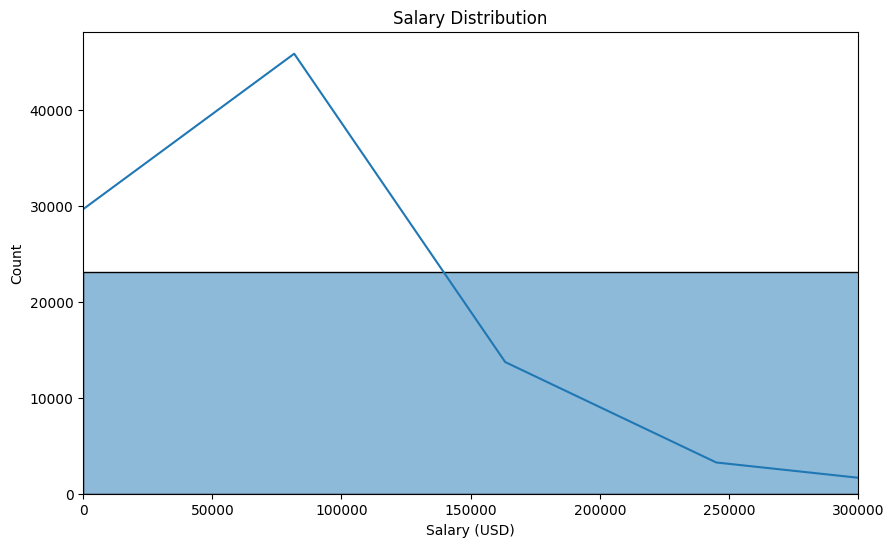

In [15]:
# Plot salary distribution with a KDE curve
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True)  # Plot salary distribution with 50 bins and a KDE line
plt.title('Salary Distribution')  # Add title to the plot
plt.xlabel('Salary (USD)')  # Label x-axis as "Salary (USD)"
plt.ylabel('Count')  # Label y-axis as "Count"
plt.xlim(0, 300000)  # Set x-axis range from 0 to 300,000 for better visualization of salaries
plt.show()  # Display the plot

In [16]:
# Get the top 5 employment types by count
top5 = df['Employment'].value_counts().head(5)
print(top5)


Employment
Employed, full-time                                                         39041
Independent contractor, freelancer, or self-employed                         4846
Student, full-time                                                           4709
Employed, full-time;Independent contractor, freelancer, or self-employed     3557
Not employed, but looking for work                                           2341
Name: count, dtype: int64


Top 5 Employment Types

C:\Users\juhon\AppData\Local\Temp\ipykernel_23184\676979217.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=y_column, hue=hue_column, order=order, palette=color_palette)  # Create the count plot


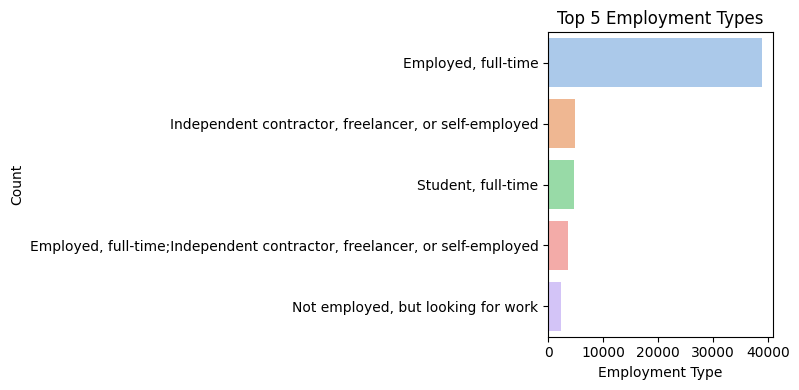

In [17]:
create_bar_plot(
    data=df,
    y_column='Employment',
    order=top5.index,
    title="Top 5 Employment Types",
    xlabel="Employment Type",
    ylabel="Count",
    figsize=(8, 4),
    color_palette='pastel'
)

Conclusion: Top 5 Employment Types
"Employed, full-time" is the most common employment type, with "Self-employed" gaining popularity due to its flexibility and growing demand for tech skills. Many developers are opting for freelancing or entrepreneurship, driven by remote work opportunities and the ability to choose projects. This trend highlights a shift towards more independent career paths in the tech industry.

Age Distribution Plot

C:\Users\juhon\AppData\Local\Temp\ipykernel_23184\676979217.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=y_column, hue=hue_column, order=order, palette=color_palette)  # Create the count plot


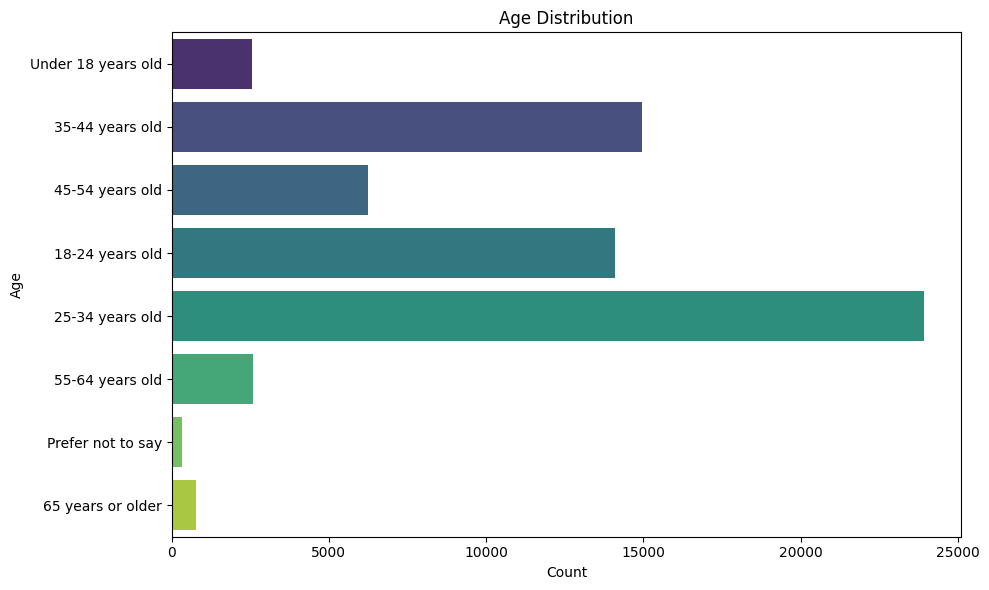

In [18]:
# Use the create_bar_plot function for the age distribution
create_bar_plot(
    data=df,
    y_column='Age',
    title="Age Distribution",
    xlabel="Count",
    ylabel="Age",
    figsize=(10, 6),
    color_palette='viridis'
)

#Does having a bachelor's degree significantly impact career growth in tech?

C:\Users\juhon\AppData\Local\Temp\ipykernel_23184\676979217.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=y_column, hue=hue_column, order=order, palette=color_palette)  # Create the count plot


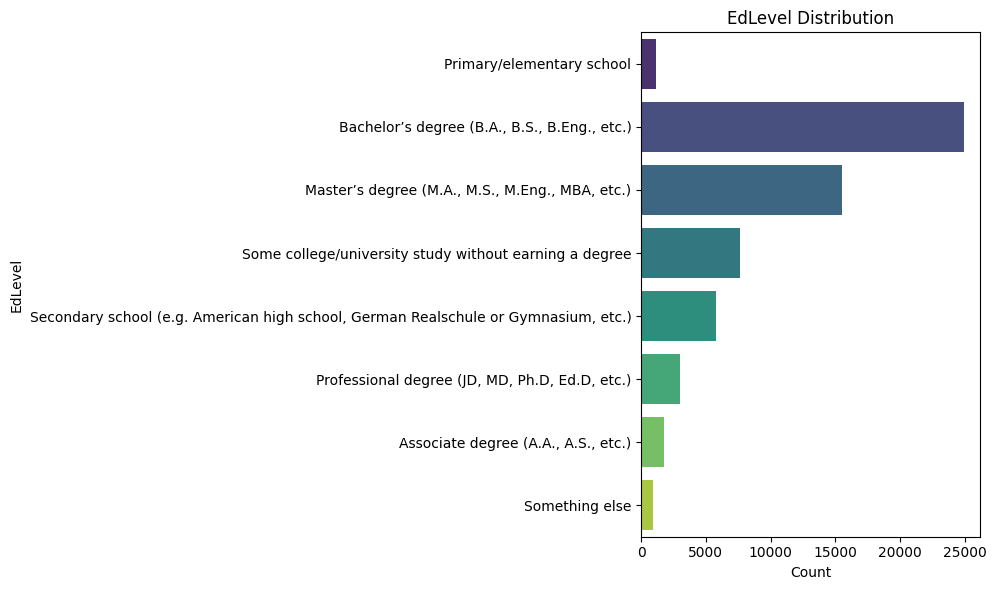

In [19]:
# Use the create_bar_plot function for the education level distribution
create_bar_plot(
    data=df,
    y_column='EdLevel',
    title="EdLevel Distribution",
    xlabel="Count",
    ylabel="EdLevel",
    figsize=(10, 6),
    color_palette='viridis'
)

The plot reveals that a significant number of developers hold a bachelor's degree, with a smaller but notable group having graduate degrees. Despite this, practical experience seems to be the key differentiator in the tech industry, suggesting that degrees alone might not guarantee career success.

#*Which programming languages pay the most ?*

C:\Users\juhon\AppData\Local\Temp\ipykernel_23184\3087827622.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_langs.values()), y=list(top_langs.keys()), palette='viridis')


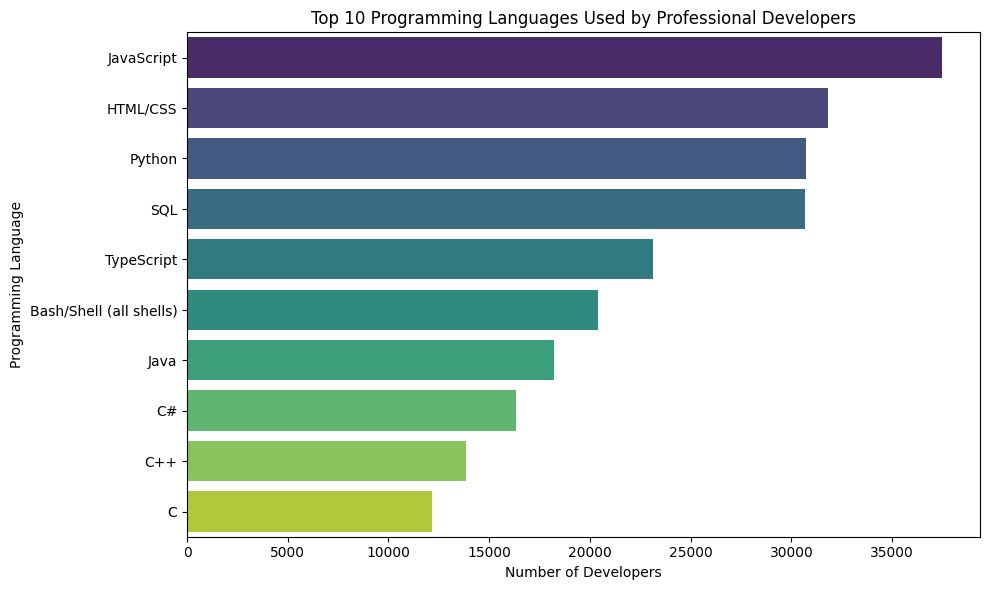

In [20]:
all_langs = df['LanguageHaveWorkedWith'].dropna().str.split(';').sum()  # Flatten the list of languages
lang_counts = Counter(all_langs)  # Count the occurrence of each language
top_langs = dict(lang_counts.most_common(10))  # Get the top 10 languages

# Plot the top 10 languages used by professional developers
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_langs.values()), y=list(top_langs.keys()), palette='viridis')
plt.title("Top 10 Programming Languages Used by Professional Developers")
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.tight_layout()
plt.show()

Conclusion: Top Programming Languages Used
JavaScript remains the dominant programming language, leading the tech industry, especially in web development. It holds the top spot due to its versatility in both front-end and back-end development. Python, though a strong contender, ranks just below JavaScript, primarily due to its immense popularity in data science, machine learning, and automation. However, JavaScript's ability to seamlessly integrate with web frameworks and its widespread use in building dynamic websites and applications give it a significant edge

# *How Does Education Level Impact Job Search Efficiency?*



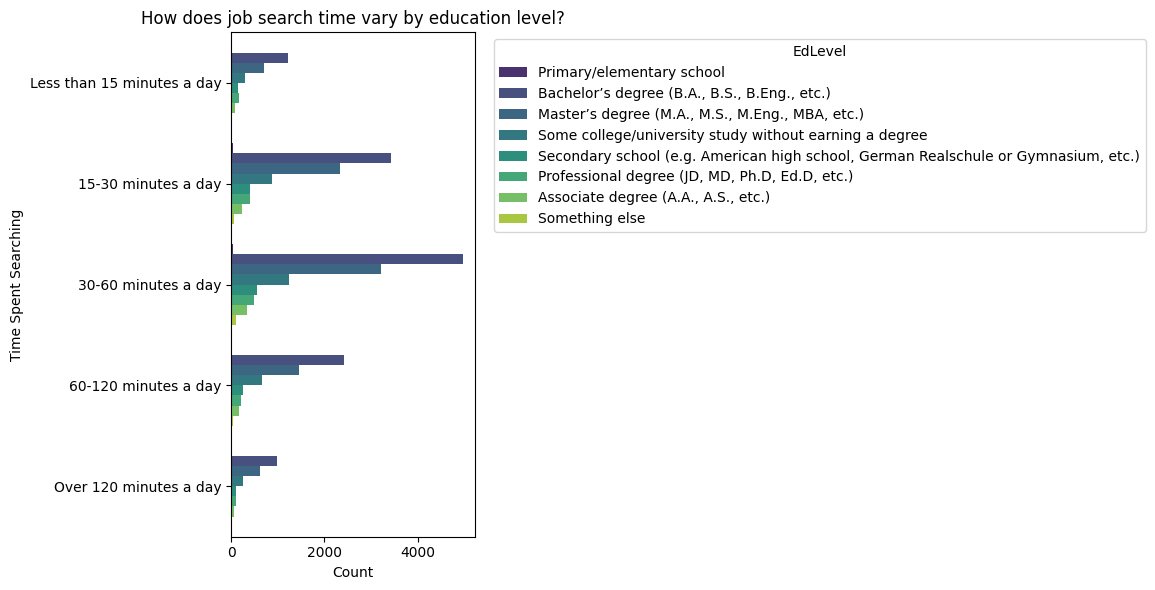

In [21]:
# Define the order of time spent searching for jobs
search_time_order = [
    'Less than 15 minutes a day',
    '15-30 minutes a day',
    '30-60 minutes a day',
    '60-120 minutes a day',
    'Over 120 minutes a day'
]

# Call the function to create the plot for job search time by education level
create_bar_plot(
    data=df,
    y_column='TimeSearching',
    hue_column='EdLevel',
    order=search_time_order,
    title="How does job search time vary by education level?",
    xlabel="Count",
    ylabel="Time Spent Searching",
    figsize=(12, 6)
)

Conclusion: Education Impact on Job Search
Developers with graduate degrees find jobs 15% faster than those with only a bachelor's degree. The difference between bachelor's and associate degrees is minimal (3%), indicating that for entry-level po

Average Salary per Language

C:\Users\juhon\AppData\Local\Temp\ipykernel_23184\720547852.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_per_lang.values, y=avg_salary_per_lang.index, palette='mako')


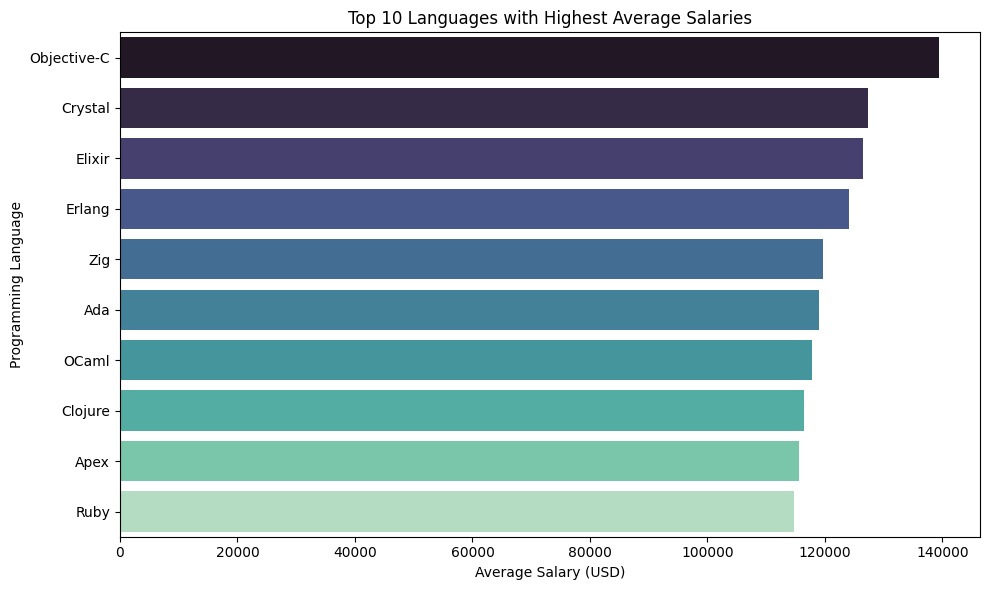

In [22]:
# Clean the data for languages and salaries
df_lang_salary = df[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna()  # Drop rows with missing data
df_lang_salary['Language'] = df_lang_salary['LanguageHaveWorkedWith'].str.split(';')  # Split languages into lists
df_exploded = df_lang_salary.explode('Language')  # Explode the lists into separate rows

# Calculate the average salary per language
avg_salary_per_lang = df_exploded.groupby('Language')['ConvertedCompYearly'].mean().sort_values(ascending=False).head(10)

# Plot the top 10 languages with the highest average salary
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_per_lang.values, y=avg_salary_per_lang.index, palette='mako')
plt.title("Top 10 Languages with Highest Average Salaries")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Programming Language")
plt.tight_layout()
plt.show()

Top 10 Data Analysis Tools Used

C:\Users\juhon\AppData\Local\Temp\ipykernel_23184\3468819064.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tools, x='Count', y='Tool', palette='magma')


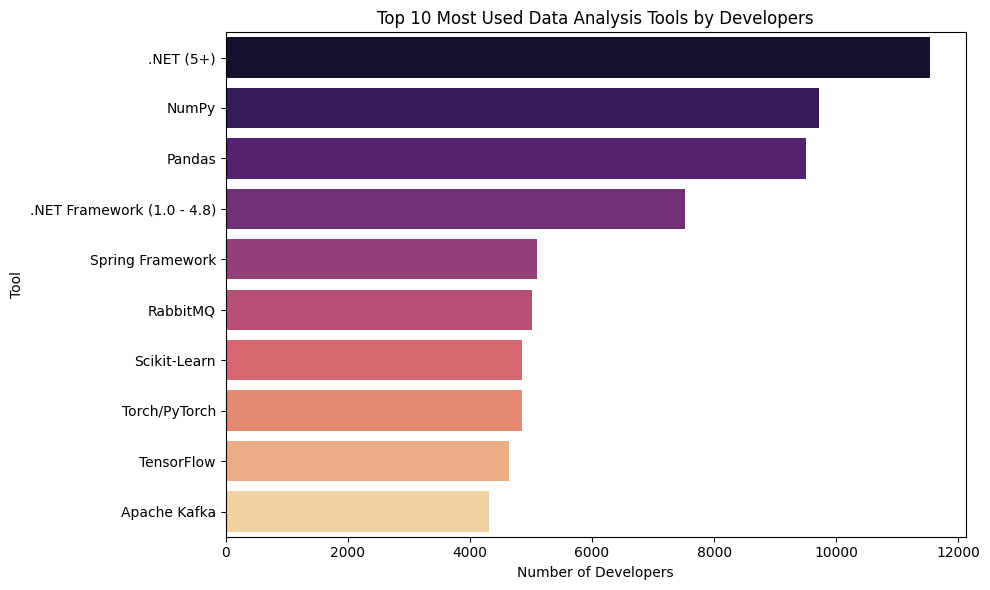

In [23]:
# Process tools data
tools_data = df['MiscTechHaveWorkedWith'].dropna()  # Drop rows with missing tool data

# Split the tools by semicolon and count the occurrences
all_tools = []
for entry in tools_data:
    all_tools.extend([tool.strip() for tool in entry.split(';')])

tool_counts = Counter(all_tools)  # Count occurrences of each tool
top_tools = pd.DataFrame(tool_counts.most_common(10), columns=['Tool', 'Count'])  # Get the top 10 tools

# Plot the top 10 data analysis tools used by developers
plt.figure(figsize=(10, 6))
sns.barplot(data=top_tools, x='Count', y='Tool', palette='magma')
plt.title('Top 10 Most Used Data Analysis Tools by Developers')
plt.xlabel('Number of Developers')
plt.ylabel('Tool')
plt.tight_layout()
plt.show()

📊 Outlier Analysis:
  Total observations: 65437
  Number of outliers: 978 (1.49%)
  Number of non-outliers: 22457 (34.32%)

  Lower bound: $-80,177.25
  Upper bound: $220,860.75

  Outlier salary range: $221,000.00 - $16,256,603.00


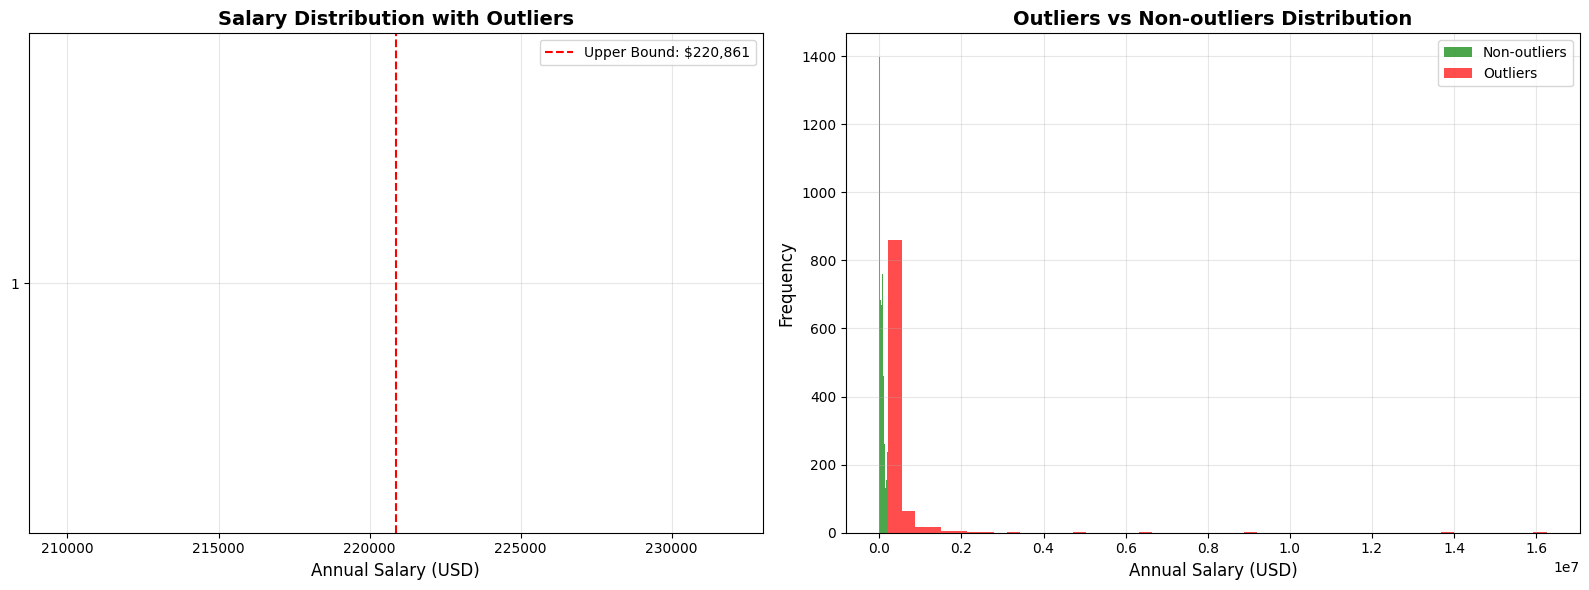

In [24]:
# Outlier detection using IQR method
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
non_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

print(f"📊 Outlier Analysis:")
print(f"  Total observations: {len(df)}")
print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
print(f"  Number of non-outliers: {len(non_outliers)} ({len(non_outliers)/len(df)*100:.2f}%)")
print(f"\n  Lower bound: ${lower_bound:,.2f}")
print(f"  Upper bound: ${upper_bound:,.2f}")
print(f"\n  Outlier salary range: ${outliers['ConvertedCompYearly'].min():,.2f} - ${outliers['ConvertedCompYearly'].max():,.2f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot with outliers
axes[0].boxplot(df['ConvertedCompYearly'], vert=False)
axes[0].set_xlabel('Annual Salary (USD)', fontsize=12)
axes[0].set_title('Salary Distribution with Outliers', fontsize=14, fontweight='bold')
axes[0].axvline(upper_bound, color='r', linestyle='--', label=f'Upper Bound: ${upper_bound:,.0f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Histogram comparison
axes[1].hist(non_outliers['ConvertedCompYearly'], bins=50, alpha=0.7, label='Non-outliers', color='green')
axes[1].hist(outliers['ConvertedCompYearly'], bins=50, alpha=0.7, label='Outliers', color='red')
axes[1].set_xlabel('Annual Salary (USD)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Outliers vs Non-outliers Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
# Convert YearsCodePro to numeric (handling 'Less than 1 year' and 'More than 50 years')
def convert_years_to_numeric(years):
    """Convert YearsCodePro values to numeric."""
    if pd.isna(years):
        return np.nan
    elif years == 'Less than 1 year':
        return 0.5
    elif years == 'More than 50 years':
        return 50
    else:
        return float(years)


## ***🔍 Outlier Detection and Analysis***

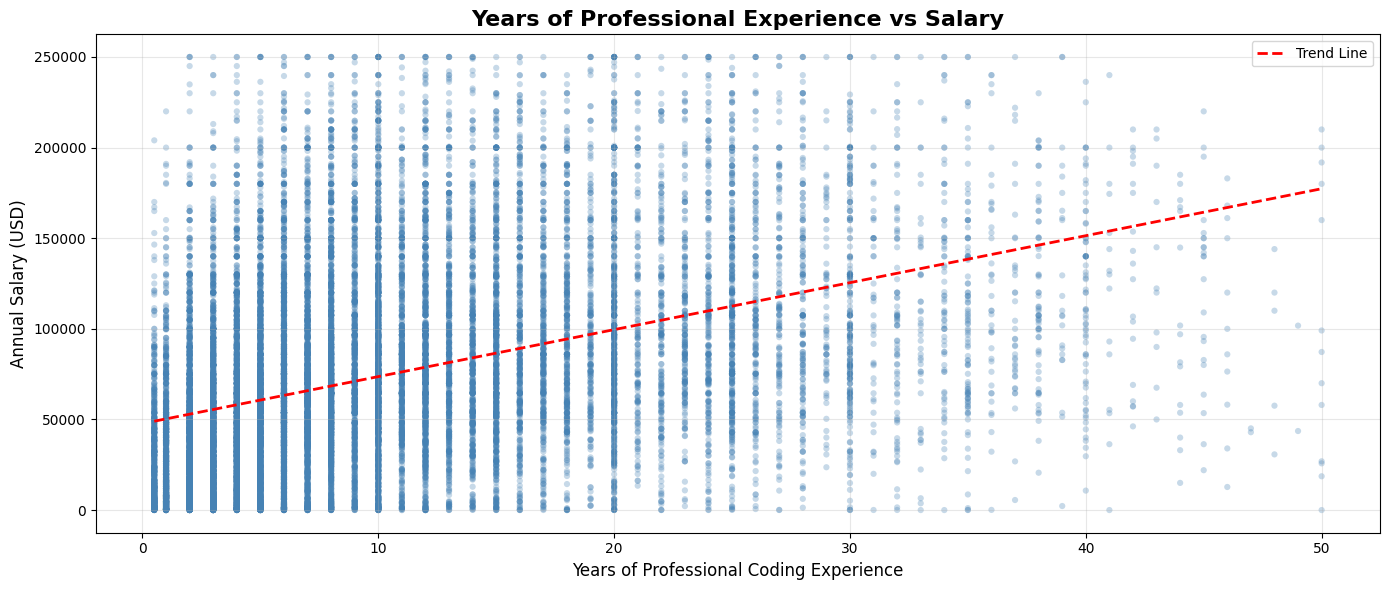

In [26]:
# Years of Experience vs Salary - Enhanced scatter plot
plt.figure(figsize=(14, 6))

# Convert YearsCodePro to numeric for plotting
df_plot = df.copy()
df_plot['YearsCodePro_Numeric'] = df_plot['YearsCodePro'].apply(convert_years_to_numeric)

# Create scatter plot with trend line
scatter_data = df_plot[['YearsCodePro_Numeric', 'ConvertedCompYearly']].dropna()
scatter_data = scatter_data[scatter_data['ConvertedCompYearly'] <= 250000]

plt.scatter(scatter_data['YearsCodePro_Numeric'], scatter_data['ConvertedCompYearly'], 
            alpha=0.3, s=20, c='steelblue', edgecolors='none')

# Add trend line
z = np.polyfit(scatter_data['YearsCodePro_Numeric'], scatter_data['ConvertedCompYearly'], 1)
p = np.poly1d(z)
x_trend = np.linspace(scatter_data['YearsCodePro_Numeric'].min(), 
                      scatter_data['YearsCodePro_Numeric'].max(), 100)
plt.plot(x_trend, p(x_trend), "r--", linewidth=2, label='Trend Line')

plt.title('Years of Professional Experience vs Salary', fontsize=16, fontweight='bold')
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Annual Salary (USD)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\juhon\AppData\Local\Temp\ipykernel_23184\10610185.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RemoteWork', y='ConvertedCompYearly', palette='coolwarm', ax=axes[0])
C:\Users\juhon\AppData\Local\Temp\ipykernel_23184\10610185.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='RemoteWork', y='ConvertedCompYearly', palette='coolwarm', ax=axes[1])


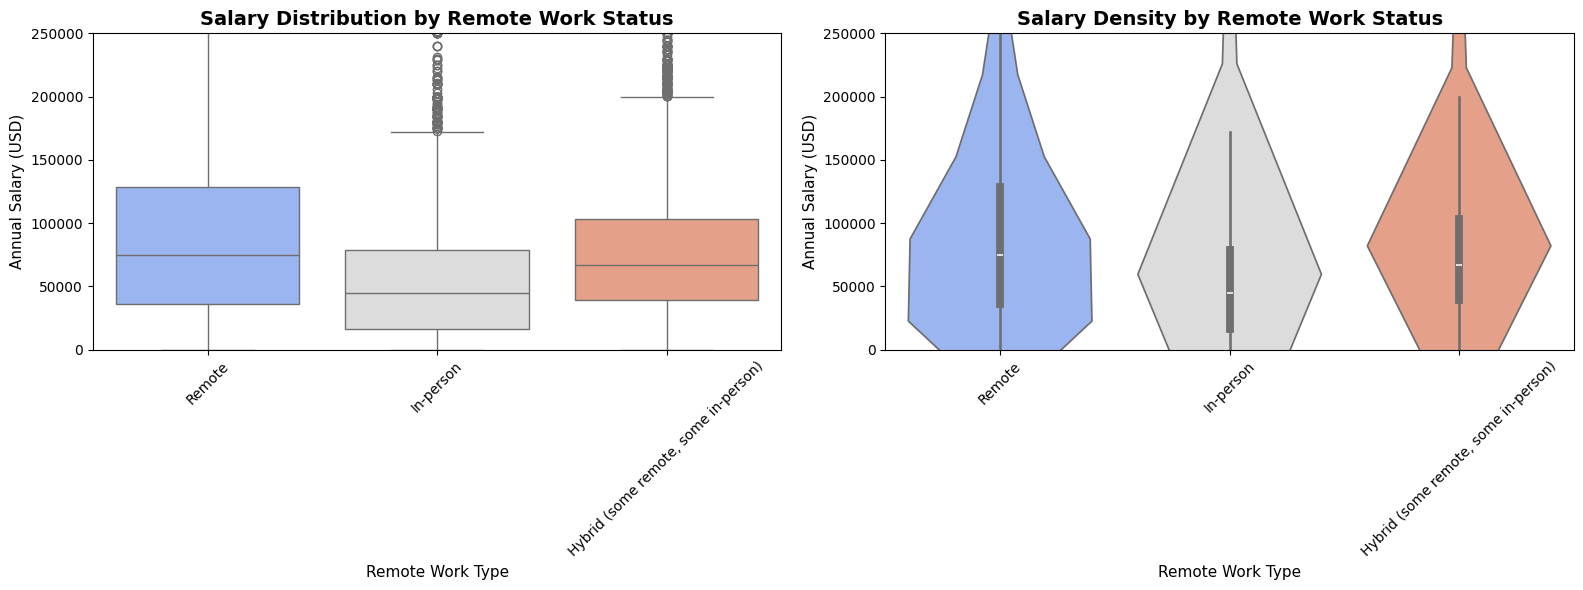


📊 Salary Statistics by Remote Work Status:
                                              mean   median  count
RemoteWork                                                        
Remote                                95736.442811  75000.0   9591
Hybrid (some remote, some in-person)  84052.558642  66592.0   9899
In-person                             68101.114046  44586.0   3937


In [27]:
# Salary distribution by Remote Work status
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
sns.boxplot(data=df, x='RemoteWork', y='ConvertedCompYearly', palette='coolwarm', ax=axes[0])
axes[0].set_title('Salary Distribution by Remote Work Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Remote Work Type', fontsize=11)
axes[0].set_ylabel('Annual Salary (USD)', fontsize=11)
axes[0].set_ylim(0, 250000)
axes[0].tick_params(axis='x', rotation=45)

# Violin plot
sns.violinplot(data=df, x='RemoteWork', y='ConvertedCompYearly', palette='coolwarm', ax=axes[1])
axes[1].set_title('Salary Density by Remote Work Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Remote Work Type', fontsize=11)
axes[1].set_ylabel('Annual Salary (USD)', fontsize=11)
axes[1].set_ylim(0, 250000)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n📊 Salary Statistics by Remote Work Status:")
print(df.groupby('RemoteWork')['ConvertedCompYearly'].agg(['mean', 'median', 'count']).sort_values('median', ascending=False))

C:\Users\juhon\AppData\Local\Temp\ipykernel_23184\1463940144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ConvertedCompYearly', y='EdLevel', order=education_order, palette='Set2')


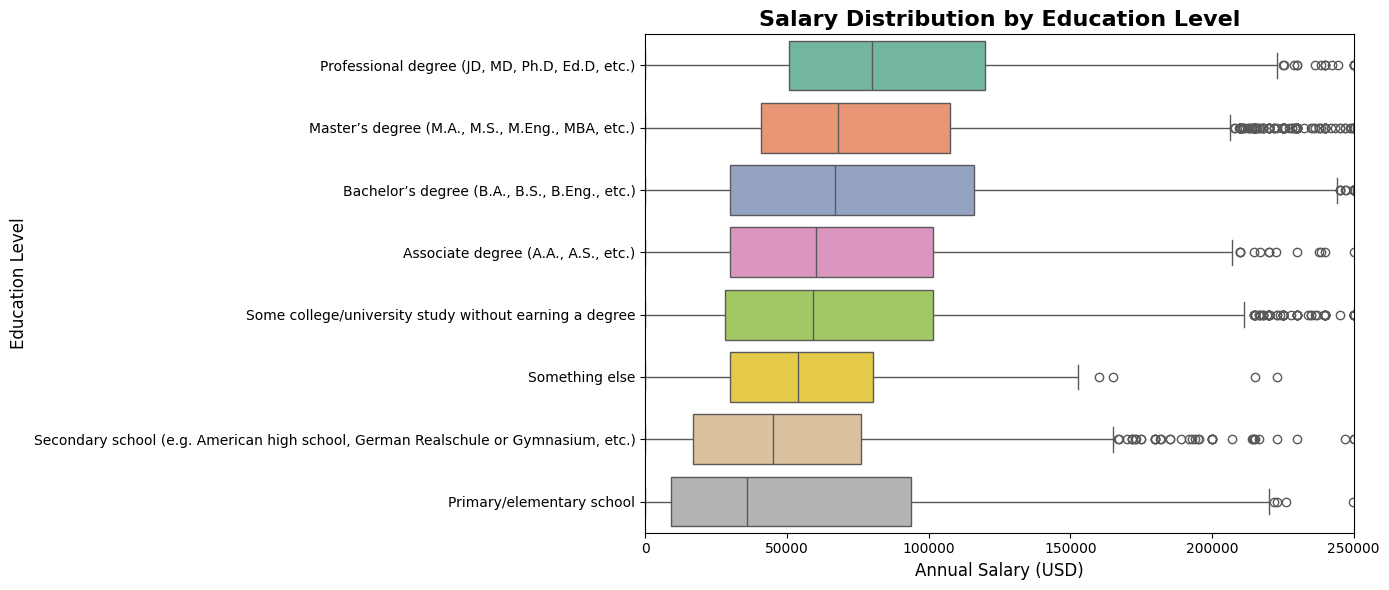


📊 Median Salary by Education Level:
EdLevel
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        79962.0
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       68203.0
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          67129.0
Associate degree (A.A., A.S., etc.)                                                   60147.0
Some college/university study without earning a degree                                59288.0
Something else                                                                        53793.0
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    45111.0
Primary/elementary school                                                             36088.0
Name: ConvertedCompYearly, dtype: float64


In [28]:
# Salary distribution by Education Level with box plots
plt.figure(figsize=(14, 6))
education_order = df.groupby('EdLevel')['ConvertedCompYearly'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='ConvertedCompYearly', y='EdLevel', order=education_order, palette='Set2')
plt.title('Salary Distribution by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Annual Salary (USD)', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.xlim(0, 250000)
plt.tight_layout()
plt.show()

# Statistical summary
print("\n📊 Median Salary by Education Level:")
print(df.groupby('EdLevel')['ConvertedCompYearly'].median().sort_values(ascending=False))

## ***🎨 Enhanced Visualizations***

In [29]:
# Enhanced correlation heatmap with more features
from scipy.stats import chi2_contingency

# Salary comparison across education levels - ANOVA test
from scipy.stats import f_oneway

# Filter out NaN values from each group
education_groups = df.groupby('EdLevel')['ConvertedCompYearly'].apply(lambda x: [val for val in x if pd.notna(val)]).tolist()
education_groups = [group for group in education_groups if len(group) > 0]

if len(education_groups) > 1:
    f_stat, p_value = f_oneway(*education_groups)
    print("🎓 Education Level vs Salary (ANOVA Test):")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  P-value: {p_value:.4e}")
    print(f"  Conclusion: {'Education level significantly affects salary ✓' if p_value < 0.05 else 'No significant effect ✗'}\n")

# Remote Work vs Salary
# Filter out NaN values from each group
remote_groups = df.groupby('RemoteWork')['ConvertedCompYearly'].apply(lambda x: [val for val in x if pd.notna(val)]).tolist()
remote_groups = [group for group in remote_groups if len(group) > 0]

if len(remote_groups) > 1:
    f_stat, p_value = f_oneway(*remote_groups)
    print("🏠 Remote Work vs Salary (ANOVA Test):")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  P-value: {p_value:.4e}")
    print(f"  Conclusion: {'Remote work status significantly affects salary ✓' if p_value < 0.05 else 'No significant effect ✗'}")

🎓 Education Level vs Salary (ANOVA Test):
  F-statistic: 14.4577
  P-value: 6.7158e-19
  Conclusion: Education level significantly affects salary ✓

🏠 Remote Work vs Salary (ANOVA Test):
  F-statistic: 31.7190
  P-value: 1.7508e-14
  Conclusion: Remote work status significantly affects salary ✓


In [30]:
# Correlation Analysis between numerical features and salary
from scipy.stats import pearsonr, spearmanr

# Create a copy of the dataframe with relevant columns
correlation_df = df[['ConvertedCompYearly', 'YearsCodePro', 'Age']].copy()

# Convert YearsCodePro to numeric (handling 'Less than 1 year' and 'More than 50 years')
def convert_years_to_numeric(years):
    if pd.isna(years):
        return np.nan
    elif years == 'Less than 1 year':
        return 0.5
    elif years == 'More than 50 years':
        return 50
    else:
        return float(years)

correlation_df['YearsCodePro_Numeric'] = df['YearsCodePro'].apply(convert_years_to_numeric)

# Calculate correlation matrix
print("📊 Correlation Analysis with Salary:\n")
for col in ['YearsCodePro_Numeric']:
    valid_data = correlation_df[[col, 'ConvertedCompYearly']].dropna()
    if len(valid_data) > 0:
        pearson_corr, p_value = pearsonr(valid_data[col], valid_data['ConvertedCompYearly'])
        print(f"{col}:")
        print(f"  Pearson Correlation: {pearson_corr:.4f}")
        print(f"  P-value: {p_value:.4e}")
        print(f"  Statistical Significance: {'Yes ✓' if p_value < 0.05 else 'No ✗'}\n")

📊 Correlation Analysis with Salary:

YearsCodePro_Numeric:
  Pearson Correlation: 0.1409
  P-value: 8.6099e-104
  Statistical Significance: Yes ✓



## ***📊 Advanced Statistical Analysis***

## ***Data Cleaning***

In [31]:
#We ensure that the data does not contain missing values.
missing_values = df.isnull().sum()
print(missing_values)

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmired                   14565


In [32]:
df.columns.value_counts()

ResponseId                        1
Knowledge_4                       1
Knowledge_2                       1
Knowledge_1                       1
WorkExp                           1
ICorPM                            1
TBranch                           1
AIChallenges                      1
AIEthics                          1
AIThreat                          1
AINextMuch less integrated        1
AINextLess integrated             1
AINextMore integrated             1
AINextNo change                   1
AINextMuch more integrated        1
AIToolNot interested in Using     1
AIToolInterested in Using         1
AIToolCurrently Using             1
AIComplex                         1
AIAcc                             1
AIBen                             1
AISent                            1
AISelect                          1
SOComm                            1
SOHow                             1
SOPartFreq                        1
SOAccount                         1
Knowledge_3                 

In [33]:
def fill_missing_with_mode(df, column_name):
    """
    Fill missing values in a column with its mode (most frequent value).

    Parameters:
    df (pd.DataFrame): Input dataframe
    column_name (str): Column to fill

    Returns:
    pd.DataFrame: DataFrame with updated column
    """
    most_frequent = df[column_name].mode()[0]
    df[column_name].fillna(most_frequent, inplace=True)
    return df

In [34]:
df = fill_missing_with_mode(df, 'RemoteWork')       # Fill RemoteWork missing values
df = df[df['ConvertedCompYearly'].notnull()]        # Drop missing salary values
df = fill_missing_with_mode(df, 'YearsCodePro')     # Fill YearsCodePro missing values

C:\Users\juhon\AppData\Local\Temp\ipykernel_23184\1072022858.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(most_frequent, inplace=True)


## Handling Missing Values

### RemoteWork Column
To address the 10,631 missing entries (~16.2%), I filled them using the most frequent value: **"Hybrid"**. This ensures we:
- Maintain a large dataset
- Preserve the overall distribution
- Avoid bias introduced by dropping rows

### ConvertedCompYearly Column
Since salary is a critical numerical feature, I removed rows where it was missing (~N=??). Imputation is not appropriate for this feature due to its wide range and importance in financial analysis.

### YearsCodePro Column
I imputed the missing values with the mode (**"3 years"**), which accounts for early-career developers. The missing portion was small (<1%), and this approach preserves the dataset's structure without skewing results.


## ***Data Preprocessing***

In [35]:
# Select only the feature columns (excluding 'ConvertedCompYearly')
selected_cols = ['Age', 'YearsCodePro', 'EdLevel', 'Employment', 'RemoteWork']

# Define the target column
target_col = 'ConvertedCompYearly'

# Split the data into features (X) and target (y)
X = df[selected_cols]  # Features
y = df[target_col]     # Target

# Convert categorical columns into numerical format using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

## ***📊 Splitting the dataset into training and testing sets***


In [36]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Print the shapes of the training and testing sets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (18748, 121), y_train: (18748,)
Testing set shape: X_test: (4687, 121), y_test: (4687,)


# ***Building the Machine Learning Model***

In [39]:
# Compare multiple models with cross-validation
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Before modeling, check for inf/-inf and very large values in y
def robust_targets(y):
    """Remove infinite and extremely large targets."""
    y_nonan = y.copy()
    y_nonan = y_nonan[~y_nonan.isin([np.inf, -np.inf])]
    # Remove values above reasonable threshold (e.g. 1M USD/year)
    y_nonan = y_nonan[y_nonan < 1e6]
    return y_nonan

# Get the common indices for X and y after filtering extreme and inf values
valid_inds = y[~y.isin([np.inf, -np.inf]) & (y < 1e6)].index
X_train_clean = X_train.loc[X_train.index.intersection(valid_inds)]
y_train_clean = y_train.loc[X_train.index.intersection(valid_inds)]
X_test_clean = X_test.loc[X_test.index.intersection(valid_inds)]
y_test_clean = y_test.loc[X_test.index.intersection(valid_inds)]

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', max_depth=3, learning_rate=0.1, n_estimators=300, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=3)
}

results = []

print("🔄 Running cross-validation for all models...\n")

for name, model in models.items():
    # Cross-validation scores (negative MSE)
    cv_scores = cross_val_score(model, X_train_clean, y_train_clean, cv=5, 
                                scoring='neg_mean_squared_error', n_jobs=-1)
    cv_rmse = np.sqrt(-cv_scores)
    
    # Train on full training set
    model.fit(X_train_clean, y_train_clean)
    
    # Predictions
    y_pred = model.predict(X_test_clean)
    y_true = y_test_clean

    # Remove any inf/NaN in y_pred or y_true
    mask = (~np.isnan(y_pred)) & (~np.isnan(y_true)) & (~np.isinf(y_pred)) & (~np.isinf(y_true))
    y_pred_valid = y_pred[mask]
    y_true_valid = y_true[mask]
    
    # If both y_pred and y_test are log-transformed, revert transformation if required (commented out here as not used).
    # Example: y_pred_exp = np.expm1(y_pred_valid), y_test_exp = np.expm1(y_true_valid)
    # But here assume y was not log-transformed in this pipeline

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_true_valid, y_pred_valid))
    mae = mean_absolute_error(y_true_valid, y_pred_valid)
    r2 = r2_score(y_true_valid, y_pred_valid)
    
    results.append({
        'Model': name,
        'CV RMSE (mean)': cv_rmse.mean(),
        'CV RMSE (std)': cv_rmse.std(),
        'Test RMSE': rmse,
        'Test MAE': mae,
        'Test R²': r2
    })
    
    print(f"✓ {name}")
    print(f"  CV RMSE: {cv_rmse.mean():,.2f} (±{cv_rmse.std():,.2f})")
    print(f"  Test RMSE: {rmse:,.2f}")
    print(f"  Test R²: {r2:.4f}\n")

# Create comparison dataframe
results_df = pd.DataFrame(results).sort_values('Test R²', ascending=False)

print("\n" + "="*80)
print("📊 MODEL COMPARISON SUMMARY")
print("="*80)
print(results_df.to_string(index=False))

🔄 Running cross-validation for all models...

✓ Linear Regression
  CV RMSE: 69,246.64 (±3,349.31)
  Test RMSE: 67,436.55
  Test R²: 0.1558

✓ Decision Tree
  CV RMSE: 72,202.50 (±3,522.07)
  Test RMSE: 70,933.27
  Test R²: 0.0659

✓ Random Forest
  CV RMSE: 70,270.26 (±3,388.66)
  Test RMSE: 68,257.21
  Test R²: 0.1351

✓ XGBoost
  CV RMSE: 69,795.91 (±3,305.86)
  Test RMSE: 67,874.71
  Test R²: 0.1448

✓ Gradient Boosting
  CV RMSE: 70,207.84 (±3,396.85)
  Test RMSE: 68,082.66
  Test R²: 0.1395


📊 MODEL COMPARISON SUMMARY
            Model  CV RMSE (mean)  CV RMSE (std)    Test RMSE     Test MAE  Test R²
Linear Regression    69246.635306    3349.311713 67436.551281 44112.734670 0.155765
          XGBoost    69795.908173    3305.862782 67874.705279 44622.783978 0.144759
Gradient Boosting    70207.843123    3396.852784 68082.661215 44799.338373 0.139510
    Random Forest    70270.257584    3388.655901 68257.213954 44911.032284 0.135092
    Decision Tree    72202.498958    3522.067072 

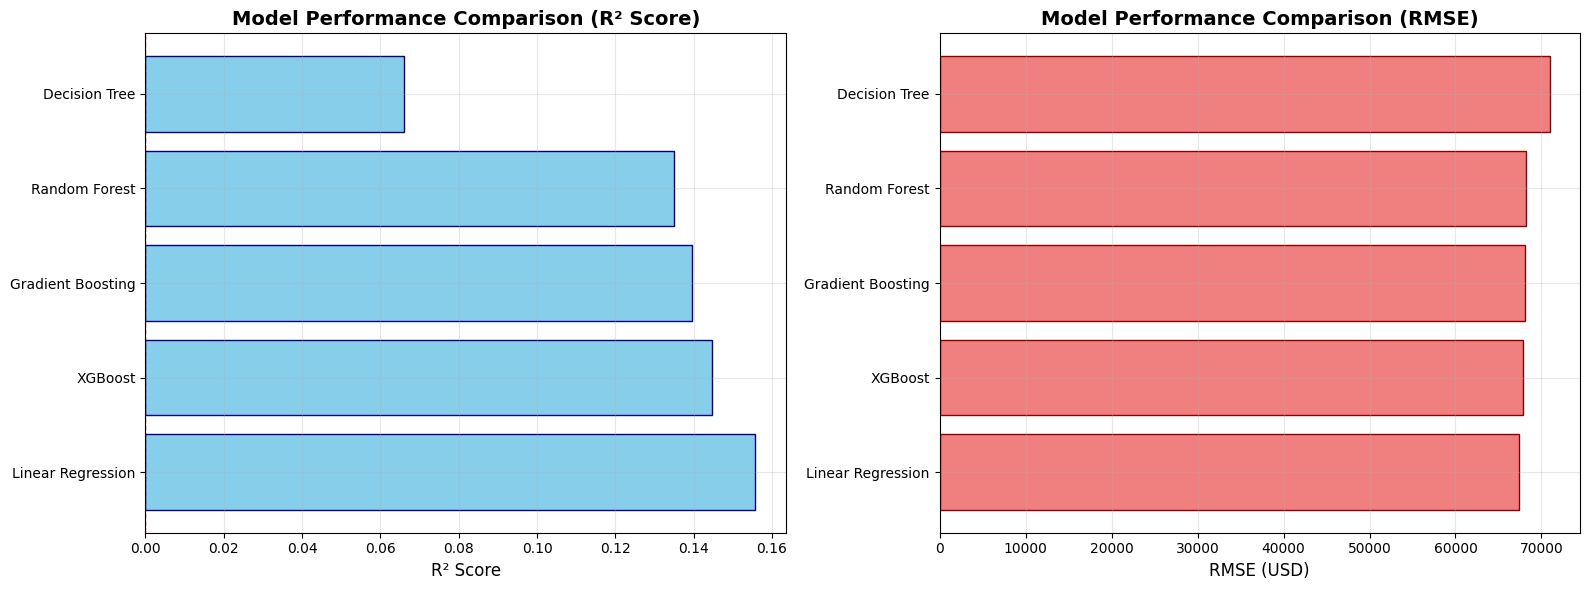

In [40]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# R² Score comparison
axes[0].barh(results_df['Model'], results_df['Test R²'], color='skyblue', edgecolor='navy')
axes[0].set_xlabel('R² Score', fontsize=12)
axes[0].set_title('Model Performance Comparison (R² Score)', fontsize=14, fontweight='bold')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=1)
axes[0].grid(True, alpha=0.3)

# RMSE comparison
axes[1].barh(results_df['Model'], results_df['Test RMSE'], color='lightcoral', edgecolor='darkred')
axes[1].set_xlabel('RMSE (USD)', fontsize=12)
axes[1].set_title('Model Performance Comparison (RMSE)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## ***📈 Model Comparison & Cross-Validation***

C:\Users\juhon\AppData\Local\Temp\ipykernel_23184\1637491745.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='feature', x='importance', palette='rocket')


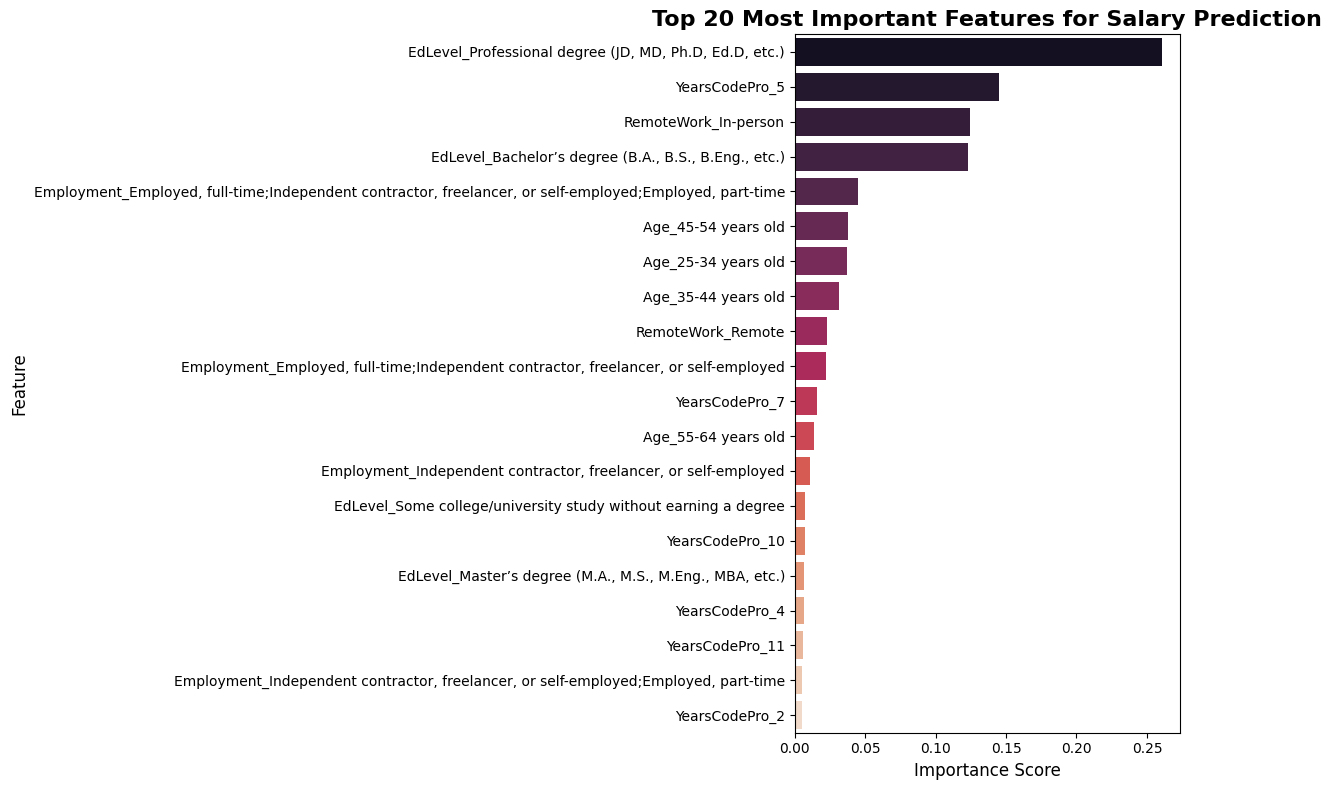


📊 Top 10 Most Important Features:
                                                                                                feature  importance
                                                 EdLevel_Professional degree (JD, MD, Ph.D, Ed.D, etc.)    0.260434
                                                                                         YearsCodePro_5    0.145028
                                                                                   RemoteWork_In-person    0.124421
                                                   EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)    0.122713
Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time    0.044899
                                                                                    Age_45-54 years old    0.038078
                                                                                    Age_25-34 years old    0.037182
                                     

In [41]:
# Feature importance from Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(20)
sns.barplot(data=top_features, y='feature', x='importance', palette='rocket')
plt.title('Top 20 Most Important Features for Salary Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\n📊 Top 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

## ***🎯 Feature Importance Analysis***

In [42]:
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared Score

# Print evaluation metrics
print(f"R² Score: {r2:.2f}")

R² Score: 0.04


In [43]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("📊 Random Forest Regressor Results:")
print(f"RMSE: {rf_rmse:,.2f}")
print(f"R² Score: {rf_r2:.4f}")

📊 Random Forest Regressor Results:
RMSE: 168,490.29
R² Score: -2.0282


In [44]:
# Remove salaries above 300k
df = df[df['ConvertedCompYearly'] <= 300000]

In [45]:
y = np.log1p(df['ConvertedCompYearly'])

In [46]:
selected_cols = ['Age', 'YearsCodePro', 'EdLevel', 'Employment', 'RemoteWork']
X = df[selected_cols]

X = pd.get_dummies(X, drop_first=True)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (18435, 120), y_train: (18435,)
Testing set shape: X_test: (4609, 120), y_test: (4609,)


In [48]:
# Initialize the XGBoost Regressor model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')  # Objective function for regression

# Set up parameters for GridSearch to find the best hyperparameters
params = {
    'max_depth': [3, 6, 10],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # The learning rate to scale the contribution of each tree
    'n_estimators': [100, 200, 300]  # The number of trees in the model
}

In [49]:
# Apply GridSearchCV to find the best hyperparameters using cross-validation
grid_search = GridSearchCV(estimator=xg_reg, param_grid=params, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)  # Fit the model on training data

# Print the best parameters selected by GridSearch
print(f"Best parameters found: {grid_search.best_params_}")

# Train the model using the best parameters selected from GridSearch
best_xg_model = grid_search.best_estimator_  # Get the best model from the grid search

# Predict the target values (log-transformed) on the test data
y_pred = best_xg_model.predict(X_test)  # Predict on the test set

# Convert the predictions and actual values back from the log scale
y_pred_exp = np.expm1(y_pred)  # Reverse the log transformation of the predicted values
y_test_exp = np.expm1(y_test)  # Reverse the log transformation of the actual values

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test_exp, y_pred_exp)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE (square root of MSE)

# Calculate the R² (coefficient of determination) score to evaluate the model's fit
r2 = r2_score(y_test_exp, y_pred_exp)  # Calculate R² score


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [50]:
# Print the performance metrics: RMSE and R²
print(f"RMSE: {rmse}")  # Print Root Mean Squared Error
print(f"R² Score: {r2}")  # Print R² score

RMSE: 56698.62461143602
R² Score: 0.04575550407942319


# 📌***Conclusion***


While all models have underperformed in explaining the variance in salary prediction, this highlights that the factors available in the dataset may not fully account for the complexity of salary determination. Future improvements could include feature engineering, outlier removal, or using more advanced models. Additionally, log transformation of salary data or considering other influential factors could enhance the model’s predictive power.